<a href="https://colab.research.google.com/github/WillHK/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/will-haeck/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Download files via curl
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data > haberman.data
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names > haberman.names
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3103  100  3103    0     0  22485      0 --:--:-- --:--:-- --:--:-- 22485
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1368  100  1368    0     0   9985      0 --:--:-- --:--:-- --:--:--  9985
haberman.data  haberman.names  sample_data


In [94]:
# Read CSV and set feature names manually
haberman = pd.read_csv('haberman.data', names=['age', 'year_of_operation', 'positive_nodes', 'survival_status'])
haberman.head()

,age,year_of_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [29]:
# Verifying 306 entries
haberman.describe()

,age,year_of_operation,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [30]:
# Checking Nans
haberman.isna().sum().sum()

0

In [95]:
# Used apply to transform the feature, map is probably more efficient I just didn't get around to using it
haberman['survival_status'] = haberman['survival_status'].apply(lambda x: 0 if x == 2 else 1)
haberman['survival_status'].value_counts()

1    225
0     81
Name: survival_status, dtype: int64

In [32]:
haberman.head()

,age,year_of_operation,positive_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [87]:
# Crosstab 
age_bins = pd.cut(haberman['age'], 5)
operation_bins = pd.cut(haberman['year_of_operation'], 4)
nodes_bins = pd.cut(haberman['positive_nodes'], 3)
pd.crosstab(haberman['survival_status'], [age_bins, nodes_bins])

age               (29.947, 40.6]                      (40.6, 51.2]  \
positive_nodes  (-0.052, 17.333] (17.333, 34.667] (-0.052, 17.333]   
survival_status                                                      
0                              3                1               26   
1                             38                1               67   

age                                                 (51.2, 61.8]  \
positive_nodes  (17.333, 34.667] (34.667, 52.0] (-0.052, 17.333]   
survival_status                                                    
0                              4              1               24   
1                              1              0               64   

age                                                 (61.8, 72.4]  \
positive_nodes  (17.333, 34.667] (34.667, 52.0] (-0.052, 17.333]   
survival_status                                                    
0                              2              1               14   
1                              4              1               41   

age                                  (72.4, 83.0]  
positive_nodes  (17.333, 34.667] (-0.052, 17.333]  
survival_status                                    
0                              2                3  
1                              2                6

In [48]:
haberman.describe()

,age,year_of_operation,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


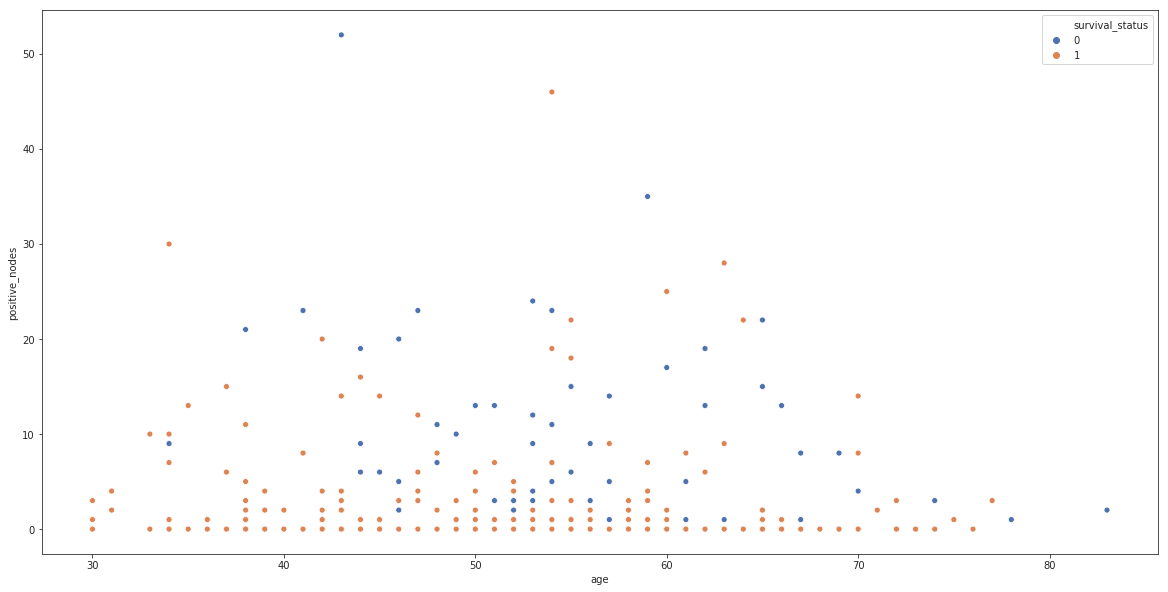

In [97]:
sns.set({"figure.figsize": (20,10)})
sns.set_style("ticks")
sns.scatterplot(haberman['age'], haberman['positive_nodes'], hue=haberman['survival_status']);

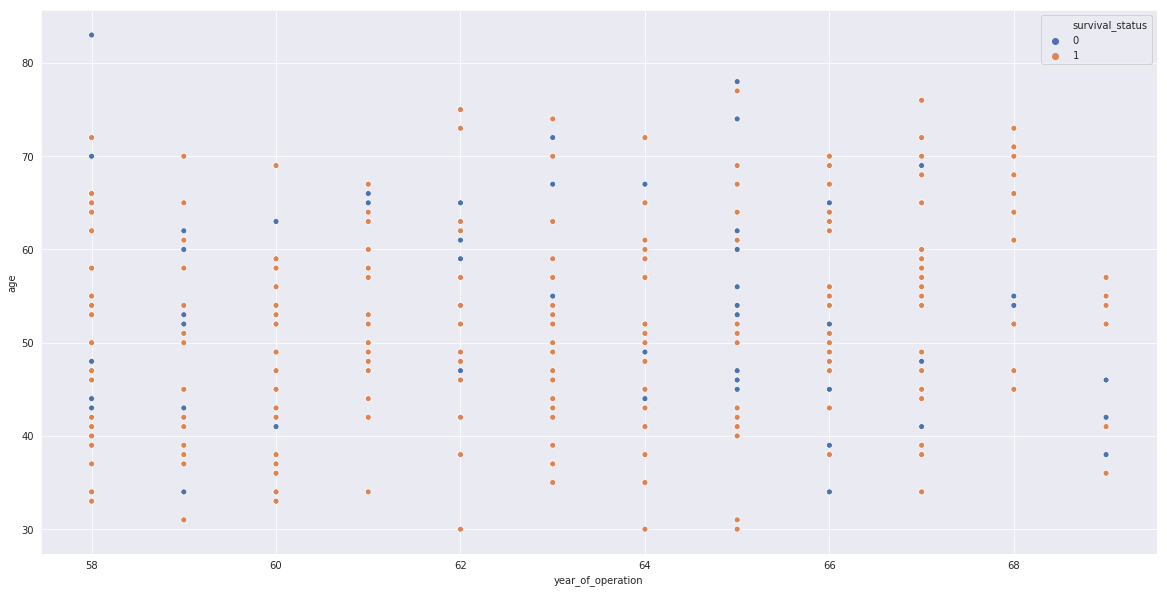

In [59]:
sns.scatterplot(haberman['year_of_operation'], haberman['age'], hue=haberman['survival_status']);

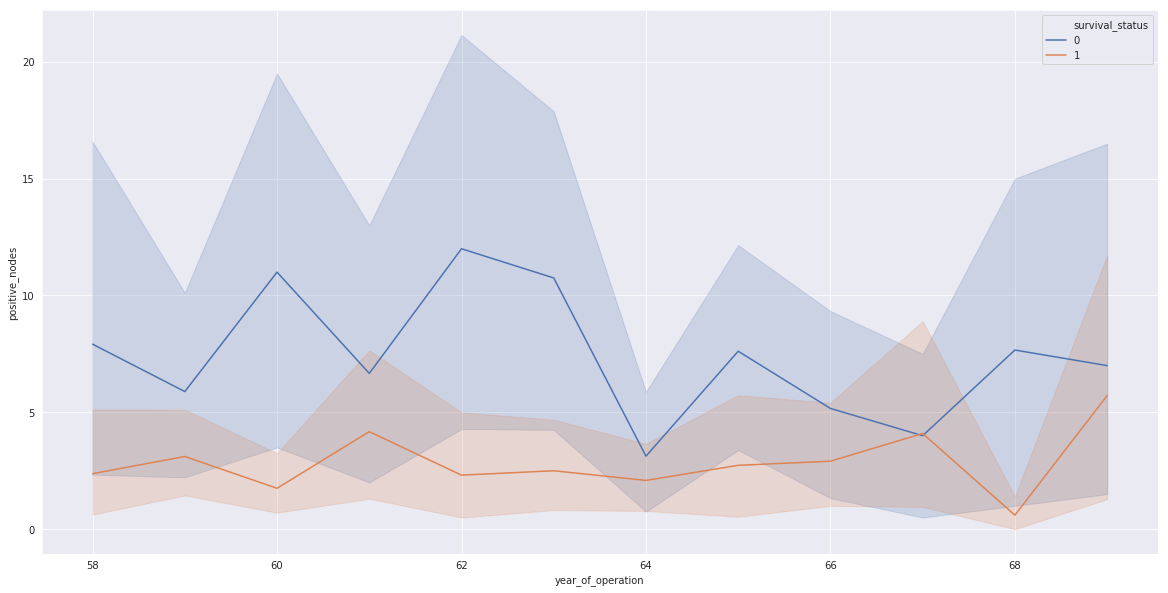

In [65]:
sns.lineplot(haberman['year_of_operation'], haberman['positive_nodes'], hue=haberman['survival_status']);

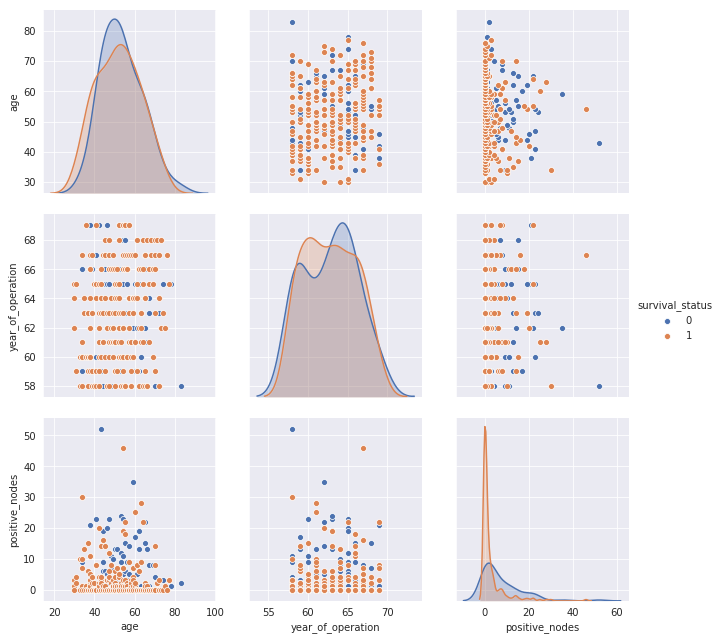

In [81]:
sns.pairplot(haberman, hue='survival_status', height=3, vars=['age', 'year_of_operation', 'positive_nodes'])
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#What is at least one feature that looks to have a positive relationship with survival?
It seems very subtle but year_of_operation seems to positively correlate with survival_status. I believe the cumulitive distribution function below best shows the relationship, prior to 59 on the whole the odds of surviving 5 years were slightly lower than the odds of not, after 68 or so this flips.

# What is at least one feature that looks to have a negative relationship with survival?

"positive_nodes" very clearly negatively impacts survival, over age and year_of_surgery those with more positive nodes have much worse survival rates. Again the CDF below demonstrates this with the way survival rates are high early but quickly not surviving catches up as the number of positive nodes grows.

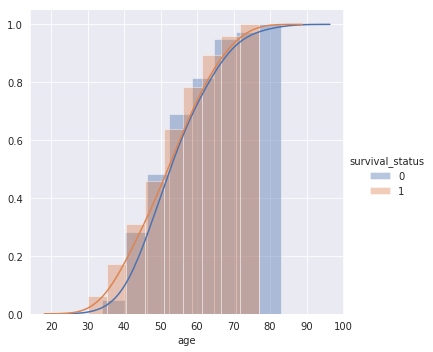

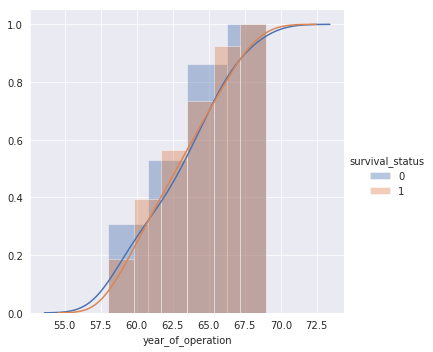

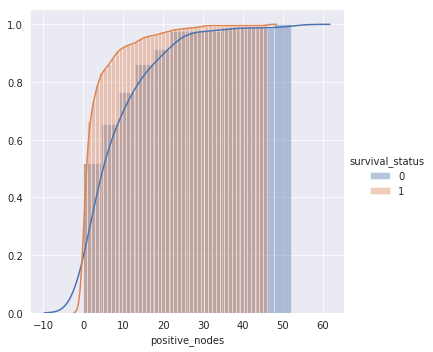

In [90]:
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    fg = sns.FacetGrid(haberman, hue='survival_status', height=5)
    fg.map(sns.distplot, feature, hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)).add_legend()
    plt.show()

#How are those two features related with each other, and what might that mean?

Presumably a larger number of positive nodes increases the difficulty of treatment while the operation taking place later means doctors have more experience and better techniques for dealing with cancers. When charted together on a lineplot, as done above, you can clearly see that while more positive nodes continues to be more lethal even into the later years of operations the survival rates do start climbing for higher positive node counts towards the end. This would indicate that while positive node count remains important it becomes slightly less relevant to the survival rate as years go on.